### Training a Policy Network 

This notebook contains an example of the training of a Policy Network.

Importing the .py files and running them :

In [1]:
import matplotlib.pyplot as plt
import importlib as imp

In [2]:
%run ./../Functions/solver.py
%run ./../Functions/generators.py
%run ./../Functions/stat_functions.py
%run ./../Functions/list_functions.py
%run ./../Functions/model_functions.py
%run ./../Functions/playing_functions.py

Using TensorFlow backend.


Let's define the list size and the bound sup as global variables:

In [3]:
sample_size = 10
bound_sup = 300
state_size = sample_size + 1

Defining the network:

In [4]:
K.clear_session()

policy_network = tf.keras.Sequential()

policy_network.add(tf.keras.layers.Dense(256,input_dim = state_size,activation='sigmoid',kernel_initializer='random_normal'))
policy_network.add(tf.keras.layers.Dense(256,activation='sigmoid',kernel_initializer='random_normal'))
policy_network.add(tf.keras.layers.Dense(256,activation='sigmoid'))
policy_network.add(tf.keras.layers.Dense(256,activation='sigmoid'))

policy_network.add(tf.keras.layers.Dense(sample_size,activation='softmax'))

learning_rate = 0.001

policy_network.compile(optimizer = tf.keras.optimizers.Adam(lr = learning_rate), 
                      loss=custom_loss,
                      metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


---

### Training 

##### Supervised training

In [5]:
test_score,test_acc,karm_scores,karm_acc = supervised_training(policy_network,100000,0.0001,sample_size,bound_sup,3)

Epochs : 0/100000
Epochs : 1000/100000
Epochs : 2000/100000
Epochs : 3000/100000
Epochs : 4000/100000
Epochs : 5000/100000
Epochs : 6000/100000
Epochs : 7000/100000
Epochs : 8000/100000
Epochs : 9000/100000
Epochs : 10000/100000
Epochs : 11000/100000
Epochs : 12000/100000
Epochs : 13000/100000
Epochs : 14000/100000
Epochs : 15000/100000
Epochs : 16000/100000
Epochs : 17000/100000
Epochs : 18000/100000
Epochs : 19000/100000
Epochs : 20000/100000
Epochs : 21000/100000
Epochs : 22000/100000
Epochs : 23000/100000
Epochs : 24000/100000
Epochs : 25000/100000
Epochs : 26000/100000
Epochs : 27000/100000
Epochs : 28000/100000
Epochs : 29000/100000
Epochs : 30000/100000
Epochs : 31000/100000
Epochs : 32000/100000
Epochs : 33000/100000
Epochs : 34000/100000
Epochs : 35000/100000
Epochs : 36000/100000
Epochs : 37000/100000
Epochs : 38000/100000
Epochs : 39000/100000
Epochs : 40000/100000
Epochs : 41000/100000
Epochs : 42000/100000
Epochs : 43000/100000
Epochs : 44000/100000
Epochs : 45000/100000
E

##### Printing the training results

Evolution du score moyen :


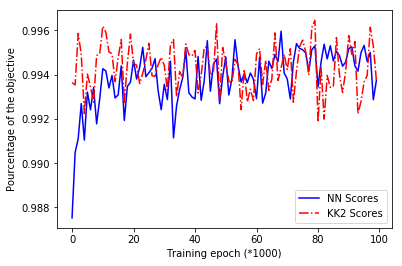

Evolution de l'accuracy moyenne :


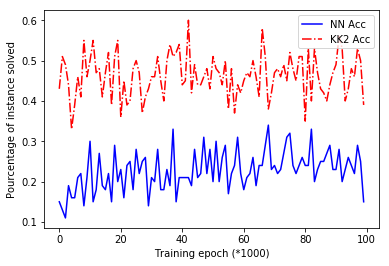

In [6]:
print('Evolution du score moyen :')
plt.xlabel('Training epoch (*1000)')
plt.ylabel('Pourcentage of the objective')
plt.plot(np.arange(len(test_score)),test_score,"b-" ,label = "NN Scores")
plt.plot(np.arange(len(test_score)),karm_scores,"r-.",label = "KK2 Scores")
plt.legend()
plt.show()


print('Evolution de l\'accuracy moyenne :')
plt.xlabel('Training epoch (*1000)')
plt.ylabel('Pourcentage of instance solved')
plt.plot(np.arange(len(test_acc)),test_acc,"b-" ,label = "NN Acc")
plt.plot(np.arange(len(test_acc)),karm_acc,"r-.",label = "KK2 Acc")
plt.legend()
plt.show() 

--- 
### Loading an already trained model

One can load an already trained NN, there are two in the "Saved Models" directory. The first one "policyS6acc96" is a policy network for lists of size 6 with an accuracy of 96% with 3 tries, the second one "policyS10acc50" is for lists of size 10 and has an accuracy of 50% with 3 tries.

In [7]:
policy_network = load_model('./../../Saved Models/','policyS10acc50')

Model loaded


Test nbr 1000/10000
Test nbr 2000/10000
Test nbr 3000/10000
Test nbr 4000/10000
Test nbr 5000/10000
Test nbr 6000/10000
Test nbr 7000/10000
Test nbr 8000/10000
Test nbr 9000/10000
Test nbr 10000/10000


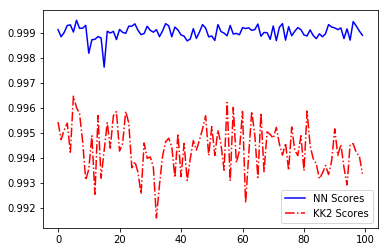

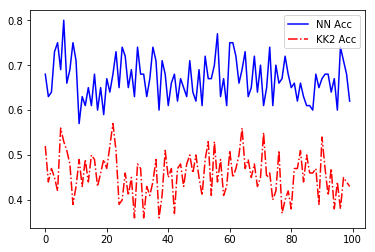

In [10]:
scores,accs,karm_scores,karm_acc = test_model(policy_network,10000,10,sample_size,bound_sup)

plt.plot(np.arange(len(scores)),scores,"b-" ,label = "NN Scores")
plt.plot(np.arange(len(scores)),karm_scores,"r-.",label = "KK2 Scores")
plt.legend()
plt.show()

plt.plot(np.arange(len(accs)),accs,"b-",label = "NN Acc")
plt.plot(np.arange(len(accs)),karm_acc,"r-.",label = "KK2 Acc")
plt.legend()
plt.show()

--- 
### Example playthrough

In [11]:
print("---------New Game--------")
init = initialization_state(sample_size,bound_sup)
print("Initial state:")
print(init)

print("---------First Move--------")

print("Probability distribution generated:")
print(policy_network.predict(np.array([init])))

action = get_best_action(policy_network,init)
print("Selected action: {}" .format(action))

next_state,d = perform_action(init,action)
print("New state:")
print(next_state)

print("---------Second Move--------")

print("Probability distribution generated:")
print(policy_network.predict(np.array([next_state])))

action = get_best_action(policy_network,next_state)
print("Selected action: {}" .format(action))

next_state,d = perform_action(next_state,action)
print("New state:")
print(next_state)

print("---------Third Move--------")
print("Probability distribution generated:")
print(policy_network.predict(np.array([next_state])))

action = get_best_action(policy_network,next_state)
print("Selected action: {}" .format(action))

next_state,d = perform_action(next_state,action)
print("New state:")
print(next_state)

print("---------Fourth Move--------")
print("Probability distribution generated:")
print(policy_network.predict(np.array([next_state])))

action = get_best_action(policy_network,next_state)
print("Selected action: {}" .format(action))

next_state,d = perform_action(next_state,action)
print("New state:")
print(next_state)

print("---------Fifth Move--------")
print("Probability distribution generated:")
print(policy_network.predict(np.array([next_state])))

action = get_best_action(policy_network,next_state)
print("Selected action: {}" .format(action))

next_state,d = perform_action(next_state,action)
print("New state:")
print(next_state)

print("-------------------------")
print("Actual solution:")
extract_subset(init[0:sample_size])

---------New Game--------
Initial state:
[10, 87, 142, 165, 170, 175, 178, 257, 281, 291, 878]
---------First Move--------
Probability distribution generated:
[[1.0616793e-11 6.8942074e-09 4.5912160e-10 3.6504137e-12 1.7575045e-12
  2.7497121e-12 3.3710732e-13 5.8450552e-14 7.7830032e-07 9.9999917e-01]]
Selected action: 9
New state:
[ 10  87 142 165 170 175 178 257 281   0 587]
---------Second Move--------
Probability distribution generated:
[[1.8974604e-05 1.3595818e-04 2.4517137e-04 1.4736258e-03 8.2751149e-03
  6.6909812e-02 1.5815131e-01 2.9834530e-01 4.6096444e-01 5.4802727e-03]]
Selected action: 7
New state:
[ 10  87 142 165 170 175 178   0 281   0 330]
---------Third Move--------
Probability distribution generated:
[[2.7324416e-04 3.2966251e-03 5.3895409e-03 9.1683730e-02 2.0126696e-01
  3.5271528e-01 3.4275460e-01 2.4703487e-03 1.4616085e-04 3.5563301e-06]]
Selected action: 5
New state:
[ 10  87 142 165 170   0 178   0 281   0 155]
---------Fourth Move--------
Probability distr

[291, 257, 178, 142, 10]